In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [65]:
df.shape

(32581, 12)

In [66]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [67]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

DATA CLEANING

In [68]:
import pandas as pd

# Load your dataset
df = pd.read_csv('credit_risk_dataset.csv')

# 1. Numerical columns: get min and max
numerical_cols = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

print("🔢 Numerical Column Ranges:")
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: Min = {min_val}, Max = {max_val}")

# 2. Categorical columns: get unique values
categorical_cols = [
    'person_home_ownership', 'loan_intent', 'loan_grade',
    'loan_status', 'cb_person_default_on_file'
]

print("\n🔠 Categorical Column Unique Values:")
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")


🔢 Numerical Column Ranges:
person_age: Min = 20, Max = 144
person_income: Min = 4000, Max = 6000000
person_emp_length: Min = 0.0, Max = 123.0
loan_amnt: Min = 500, Max = 35000
loan_int_rate: Min = 5.42, Max = 23.22
loan_percent_income: Min = 0.0, Max = 0.83
cb_person_cred_hist_length: Min = 2, Max = 30

🔠 Categorical Column Unique Values:
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
loan_status: [1 0]
cb_person_default_on_file: ['Y' 'N']


In [69]:
import pandas as pd

# Load dataset
df = pd.read_csv('credit_risk_dataset.csv')

# 1. Remove or cap unrealistic person_age
df = df[df['person_age'] <= 100]

# Optional: cap instead of remove
# df['person_age'] = df['person_age'].apply(lambda x: min(x, 100))

# 2. Remove or cap unrealistic employment length
df = df[df['person_emp_length'] <= 60]

# Optional: cap instead of remove
# df['person_emp_length'] = df['person_emp_length'].apply(lambda x: min(x, 60))

# Quick check after cleaning
print("After Cleaning:")
print("person_age max:", df['person_age'].max())
print("person_emp_length max:", df['person_emp_length'].max())
print("New shape of dataset:", df.shape)


After Cleaning:
person_age max: 94
person_emp_length max: 41.0
New shape of dataset: (31679, 12)


In [70]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3047
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [71]:
# 3. Remove outliers in person_income (very high income values)
df = df[df['person_income'] <= 500000]

# 4. Optionally filter or cap loan_percent_income
df = df[df['loan_percent_income'] <= 0.6]  # 60% of income going to loan is high already

# Check updated stats
print("After removing extreme income and loan_percent_income values:")
print("person_income max:", df['person_income'].max())
print("loan_percent_income max:", df['loan_percent_income'].max())
print("Dataset shape:", df.shape)


After removing extreme income and loan_percent_income values:
person_income max: 500000
loan_percent_income max: 0.6
Dataset shape: (31581, 12)


In [72]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3037
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [73]:
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].transform(
    lambda x: x.fillna(x.median())
)

In [74]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [75]:
mldf=df.copy()

DATA VISULIZATION

RESEARCH QUESTIONS

Borrower Demographics

How does loan default vary by age group?

Segment person_age into bins (e.g., 20–30, 31–40…) and compare default rates.

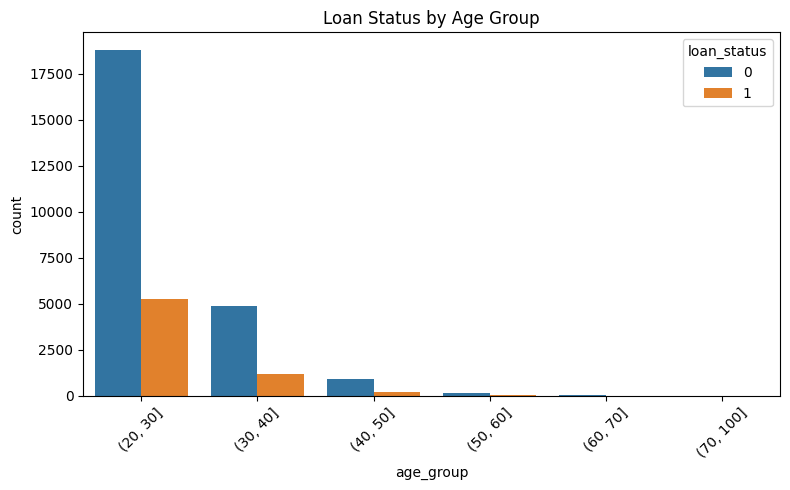

In [76]:
df['age_group'] = pd.cut(df['person_age'], bins=[20, 30, 40, 50, 60, 70, 100])
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age_group', hue='loan_status')
plt.title('Loan Status by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Majority of Borrowers Are Young (20–30)

This age group has the highest loan count.

It also contributes significantly to defaults.

Shows a risky segment with high participation and notable defaults.

Age 30–40

Still a large borrower base, but fewer loans than 20–30.

Default count is present but lower than 20–30.

Older Age Groups (40+)

Loan activity significantly drops.

Defaults are very low in older age brackets.

Possible reasons: fewer loan needs, better creditworthiness, or conservative borrowing behavior.

Very Low Activity After 50

Minimal loans and almost no defaults after age 50.

These segments are not significant in loan portfolios.

Income and Employment

Is there a correlation between income and loan amount?

Scatter plot: person_income vs. loan_amnt

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a color map manually
color_map = {0: 'green', 1: 'red'}

# Map colors
df['color'] = df['loan_status'].map(color_map)

plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['person_income'],
    y=df['loan_amnt'],
    c=df['color'],
    alpha=0.5,
    label='Loan Status'
)

# Custom legend
import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='Fully Paid')
red_patch = mpatches.Patch(color='red', label='Default')
plt.legend(handles=[green_patch, red_patch])

plt.title('Scatter Plot: Person Income vs Loan Amount')
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()



No Strong Linear Correlation
You might expect higher incomes to correspond with higher loan amounts — but the plot doesn’t show a clear upward trend.

Borrowers earning as low as $10,000 and as high as $300,000+ take similar loan amounts (mostly under $35,000).

2. Loan Amount Cap is Visible
Most loan amounts cluster below $35,000, suggesting a cap or a lending policy limit.

This also explains the horizontal "stripes" — standardized loan amounts like $5k, $10k, $20k.

3. High-Density Zone at Lower Incomes
Most loans (green and red) are concentrated in the income range of $10,000 to $150,000.

Lending institutions may have a primary customer base within this income bracket.

4. Defaults Appear Across All Incomes
🔴 Defaults (red dots) are not limited to low-income borrowers.

Even borrowers with high incomes default — though visually, lower income ranges have denser red dots.

Are higher earners less likely to default?

Compare default rate by income quartiles or bins.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create income quartiles if not already present
df['income_group'] = pd.qcut(df['person_income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Group and calculate default rates (with observed=False)
default_rates = df.groupby('income_group', observed=False)['loan_status'].mean().reset_index()
default_rates.columns = ['Income Group', 'Default Rate']

# Plot without palette to avoid Seaborn future warning
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=default_rates, x='Income Group', y='Default Rate', color='steelblue')

# Add percentage labels
for i, row in default_rates.iterrows():
    rate = row['Default Rate']
    ax.text(i, rate + 0.02, f"{rate:.2%}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Format
plt.title('Default Rate by Income Group')
plt.ylabel('Default Rate')
plt.xlabel('Income Quartile')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


1. Strong Negative Correlation
As income increases, default rate consistently decreases.

This is a clear sign that higher income = lower risk.

2. Very High Risk in Low Income Group
🔴 Low income borrowers have a default rate of ~39.65% – very high.

Indicates financial instability or inability to repay even small loans.

3. Safest Group: Very High Income
✅ Very High earners default only ~9.41% of the time.

Likely due to better repayment capacity and financial literacy.

4. Sharp Drop between Low → Medium
The biggest jump in safety is seen from Low to Medium (almost a 2× improvement).

That transition point may be a good threshold for custom loan policies

Does employment length influence the likelihood of default?

Bar plot of default rates across person_emp_length ranges.



In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bin person_emp_length into custom ranges
df['emp_length_group'] = pd.cut(
    df['person_emp_length'],
    bins=[-1, 5, 10, 20, 30, 60],
    labels=['0-5', '6-10', '11-20', '21-30', '30+']
)

# 2. Calculate default rates by group (with observed=False to avoid warnings)
emp_defaults = df.groupby('emp_length_group', observed=False)['loan_status'].mean().reset_index()
emp_defaults.columns = ['Employment Length', 'Default Rate']

# 3. Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=emp_defaults, x='Employment Length', y='Default Rate', color='teal')

# 4. Add % labels
for i, row in emp_defaults.iterrows():
    rate = row['Default Rate']
    ax.text(i, rate + 0.015, f"{rate:.2%}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Styling
plt.title('Default Rate by Employment Length Group')
plt.xlabel('Years of Employment')
plt.ylabel('Default Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


. Less Experience = Higher Default
Borrowers with 0–5 years of employment have the highest default rate (~23.7%).

Suggests job instability or early-career financial management issues.

2. Most Stable Group: 30+ Years
Borrowers with 30+ years of employment have the lowest default rate (~14.3%).

Indicates a correlation between work experience and financial reliability.

3. Interesting Spike in 21–30 Years
There's a surprising uptick in default for the 21–30 year group (22.6%), higher than 6–20 year ranges.

Possible explanations:

Smaller sample size in this bin

Mid/late-career financial stress (e.g., mortgages, dependents)

Misreporting or data noise



Loan Intent and Risk

Which loan purposes (loan_intent) are riskiest?

Default rate per category (e.g., Medical, Education, etc.)

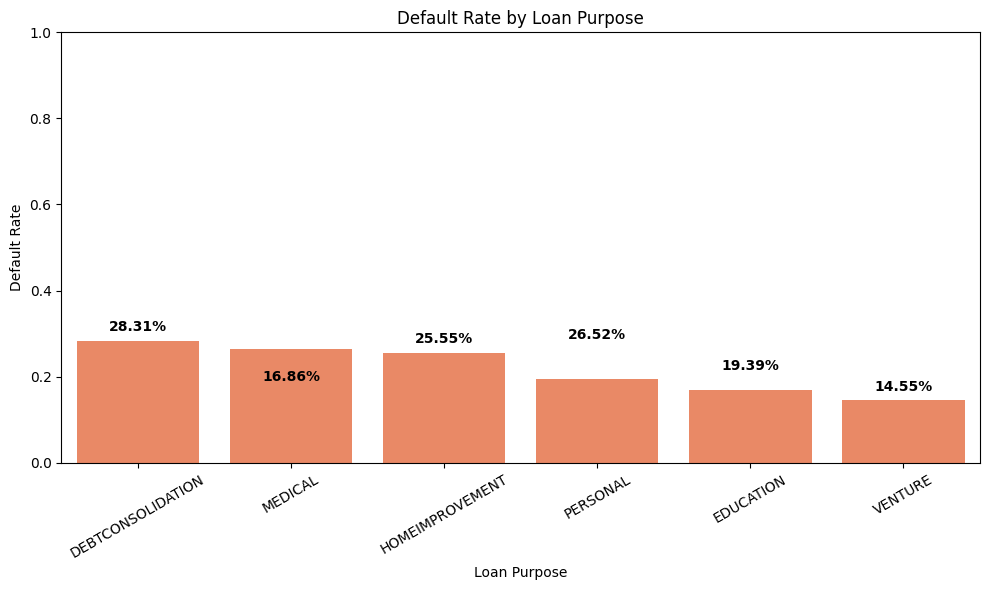

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate default rate by loan_intent
intent_defaults = df.groupby('loan_intent', observed=False)['loan_status'].mean().reset_index()
intent_defaults.columns = ['Loan Purpose', 'Default Rate']

# 2. Sort by highest default rate
intent_defaults = intent_defaults.sort_values(by='Default Rate', ascending=False)

# 3. Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=intent_defaults, x='Loan Purpose', y='Default Rate', color='coral')

# 4. Add percentage labels
for i, row in intent_defaults.iterrows():
    rate = row['Default Rate']
    ax.text(i, rate + 0.015, f"{rate:.2%}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Styling
plt.title('Default Rate by Loan Purpose')
plt.ylabel('Default Rate')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


. 🔴 Debt Consolidation Loans Are the Riskiest
Default Rate: 28.31%

These loans are typically taken by borrowers already in debt → higher risk.

Red flag for lenders — may need tighter credit policies here.

2. 🟠 Home Improvement & Personal Loans Also Risky
HOMEIMPROVEMENT: 25.55%

PERSONAL: 26.52%

Suggests moderate to high risk — possibly due to discretionary spending or lower collateral.

3. 🟡 Education Loans Are Mid-Risk
Default Rate: 19.39%

Indicates a mix of long-term benefit and short-term repayment burden.

4. 🟢 Venture Loans Are the Safest
Default Rate: 14.55%

Counterintuitive — perhaps venture applicants are more financially prepared or the group is smaller and more filtered.

5. 🔵 Medical Loans Surprisingly Lower Than Average
Default Rate: 16.86%

Could imply these loans are taken out of necessity and borrowers prioritize repayment.



Which loan grades have the highest default rates?

Visualize loan_status across loan_grade (ordinal)

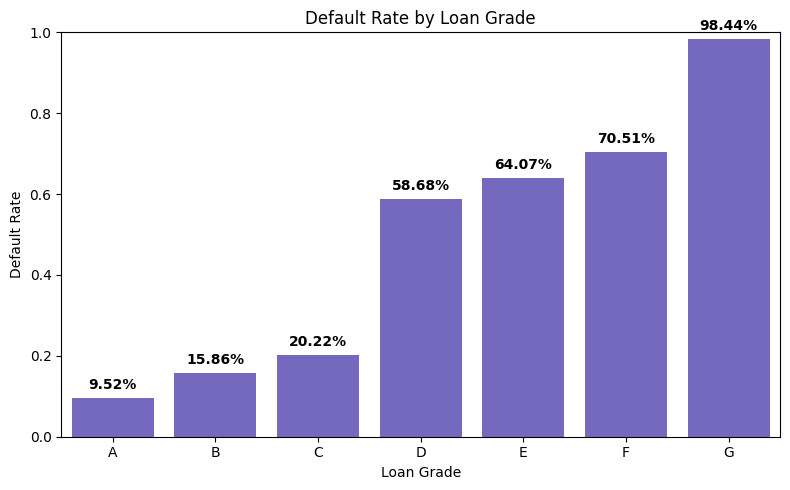

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the proper order for loan grades (ordinal)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# 2. Calculate default rate per grade
grade_defaults = df.groupby('loan_grade', observed=False)['loan_status'].mean().reindex(grade_order).reset_index()
grade_defaults.columns = ['Loan Grade', 'Default Rate']

# 3. Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=grade_defaults, x='Loan Grade', y='Default Rate', order=grade_order, color='slateblue')

# 4. Add percentage labels
for i, row in grade_defaults.iterrows():
    rate = row['Default Rate']
    ax.text(i, rate + 0.015, f"{rate:.2%}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Styling
plt.title('Default Rate by Loan Grade')
plt.ylabel('Default Rate')
plt.xlabel('Loan Grade')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


1. ✅ Clear Ordinal Pattern: Risk Increases Down the Grades
Grade A: Only ~9.52% of loans default — safest group.

Grade B & C: Slightly riskier — but still relatively stable.

Grade D and beyond: Sharp rise in risk — over 58%+ defaults.

Grade G: 🚨 98.44% of loans default — almost all are losses.

2. 🔥 Exponential Increase in Default Rates
From Grade C to D, default rate jumps by ~3× (20% → 59%)

By the time you reach Grade F or G, more than 2 out of 3 loans default

This validates that the loan grading system is a very strong predictor of borrower risk.

✅ Conclusion
Grade	Default Risk	Notes
A–C	🟢 Low	Safer investment, good for conservative lending
D–F	🟠–🔴 High	Risky loans — higher interest needed or stricter rules
G	🔥 Extremely High	Nearly all loans default — may not be worth issuing

Loan Characteristics

Do higher interest rates correlate with higher defaults?

Box plot or line plot of loan_int_rate vs. loan_status

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional (if not already done): create human-readable labels
df['loan_status_label'] = df['loan_status'].map({0: 'Fully Paid', 1: 'Default'})

# Plot using hue to safely use a color palette
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='loan_status_label', y='loan_int_rate', hue='loan_status_label', palette='Set2', dodge=False, legend=False)

# Titles and labels
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.tight_layout()
plt.show()


1. 🔺 Defaulted loans tend to have higher interest rates
Median interest rate for defaults is clearly higher than that of fully paid loans.

The entire box (IQR) for defaults is shifted upward, indicating systematic higher rates for risky borrowers.

2. 🎯 Risk-Based Pricing is Evident
This chart confirms that the lender applied risk-based interest rates:
Riskier borrowers (who ultimately defaulted) were charged higher rates.

3. 📉 Not All High Interest Loans Default
Some borrowers with high interest still paid off their loans.

Suggests interest rate alone is not a perfect predictor of default — it must be combined with other features in your model.

4. 🔍 Overlap Exists
While the medians differ, there’s overlap between both boxes.

Some low-interest loans still default, and some high-interest loans don’t.

✅ Conclusion
Insight	Explanation
💡 Higher interest = higher likelihood of default	Confirmed by higher median for defaulted loans
📊 Interest rate is a strong feature	But not sufficient alone — combine with credit history, income, etc.
📉 Some high-interest loans succeed	Risk-based pricing works, but it’s not foolproof

What’s the relationship between loan amount and risk?

Analyze loan_amnt distribution for defaulted vs. paid loans.

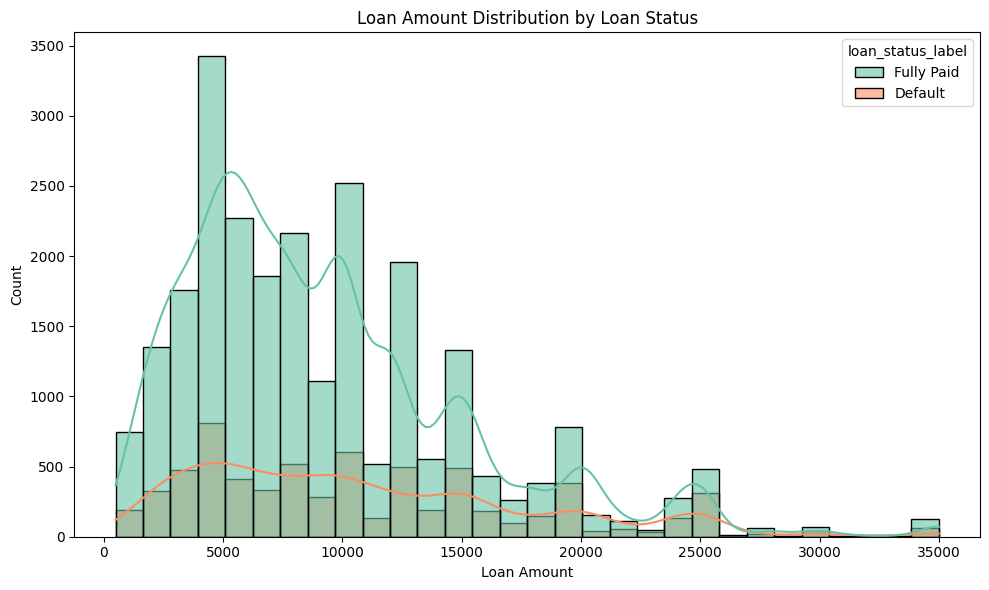

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the label column exists
df['loan_status_label'] = df['loan_status'].map({0: 'Fully Paid', 1: 'Default'})

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='loan_amnt',
    hue='loan_status_label',    # Grouping by readable label
    kde=True,
    bins=30,
    palette='Set2',
    alpha=0.6
)

plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.tight_layout()
plt.show()  # No plt.legend() needed!


1. 🎯 Most Loans Are Small to Mid-Sized
Highest concentration is around $5,000 to $10,000

Majority of borrowers request within this bracket

2. ❗ Defaults Happen Across Loan Sizes
Default curve follows similar shape to paid loans, but:

Slightly more spread out

Extends more visibly into higher loan amounts (above $20k)

Suggests: Default risk increases slightly with loan size, but not drastically.

3. 🔄 Loan Amount Alone Isn’t a Strong Indicator
Since both distributions are similar in shape, loan amount alone doesn’t predict risk

It may still help when combined with income, intent, or credit history



Does loan percent income influence default risk?

Group by loan_percent_income and plot default percentages.

posx and posy should be finite values
posx and posy should be finite values


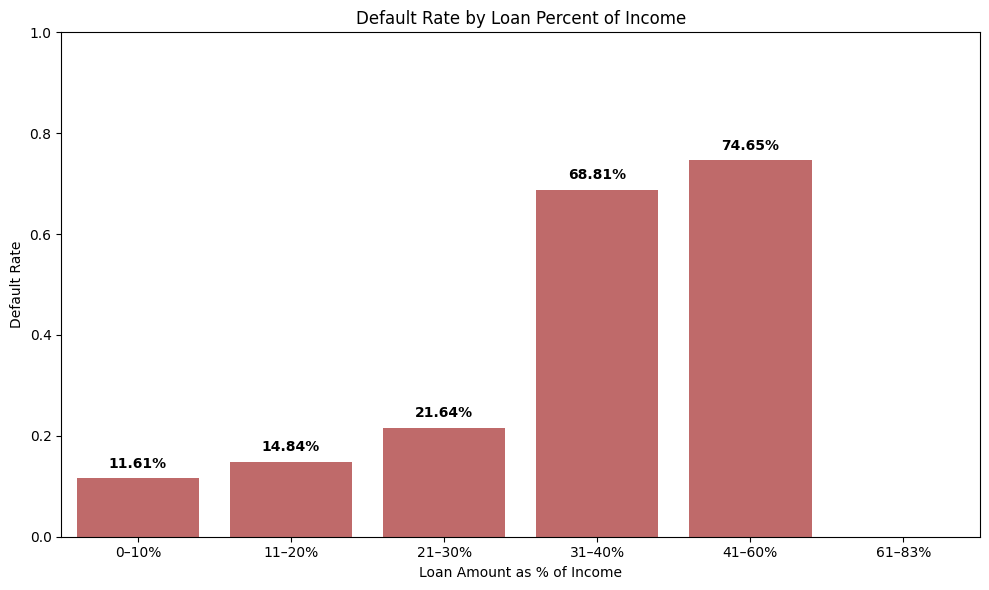

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bin loan_percent_income into categories
df['loan_pct_income_group'] = pd.cut(
    df['loan_percent_income'],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.83],
    labels=['0–10%', '11–20%', '21–30%', '31–40%', '41–60%', '61–83%']
)

# 2. Calculate default rates per bin
percent_income_default = df.groupby('loan_pct_income_group', observed=False)['loan_status'].mean().reset_index()
percent_income_default.columns = ['Loan % of Income', 'Default Rate']

# 3. Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=percent_income_default, x='Loan % of Income', y='Default Rate', color='indianred')

# 4. Add labels
for i, row in percent_income_default.iterrows():
    rate = row['Default Rate']
    ax.text(i, rate + 0.015, f"{rate:.2%}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Style
plt.title('Default Rate by Loan Percent of Income')
plt.xlabel('Loan Amount as % of Income')
plt.ylabel('Default Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [85]:
df['loan_pct_income_group'].value_counts()


loan_pct_income_group
11–20%    11772
0–10%     10168
21–30%     6020
31–40%     2607
41–60%     1014
61–83%        0
Name: count, dtype: int64

1. ✅ Strong Positive Correlation
As loan percent of income increases, so does the risk of default.

0–10% group has only ~11.61% default rate (very safe).

Default rate jumps gradually to:

~14.8% for 11–20%

~21.6% for 21–30%

Then it skyrockets:

~68.8% for 31–40%

~74.6% for 41–60%

2. ⚠️ Very High Risk at 30%+ Threshold
Once a borrower's loan crosses 30% of their income, the default rate more than triples.

Indicates a critical stress point — likely due to repayment burden becoming unmanageable.



Credit History

Does prior default (cb_person_default_on_file) indicate current risk?

Grouped bar: prior default vs. current loan outcome

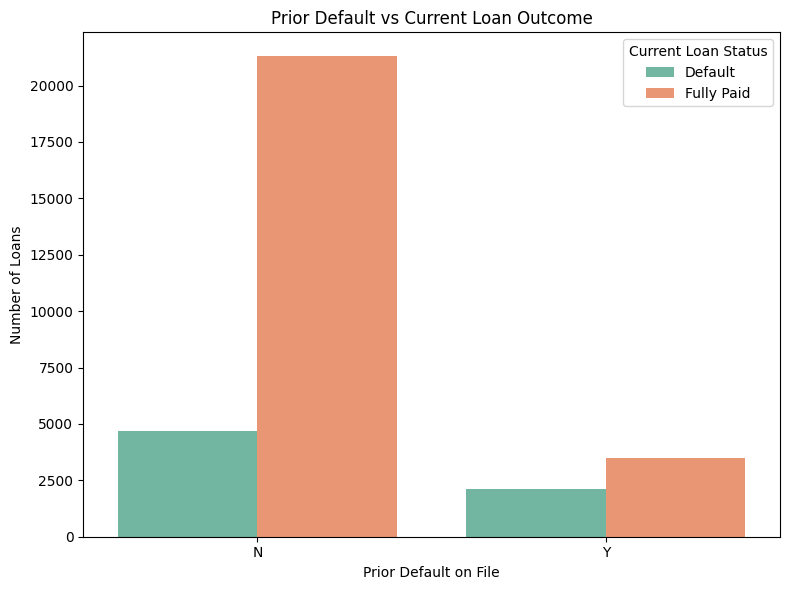

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: readable loan status label
df['loan_status_label'] = df['loan_status'].map({0: 'Fully Paid', 1: 'Default'})

# 1. Group and count
prior_default_ct = df.groupby(['cb_person_default_on_file', 'loan_status_label']).size().reset_index(name='Count')

# 2. Plot grouped bar
plt.figure(figsize=(8, 6))
sns.barplot(data=prior_default_ct, x='cb_person_default_on_file', y='Count', hue='loan_status_label', palette='Set2')

# 3. Style
plt.title('Prior Default vs Current Loan Outcome')
plt.xlabel('Prior Default on File')
plt.ylabel('Number of Loans')
plt.legend(title='Current Loan Status')
plt.tight_layout()
plt.show()


1. 🔴 Borrowers with Prior Defaults (Y) Are Riskier
While the total number of borrowers with Y is smaller (naturally fewer prior defaulters),
a larger portion of them default again.

The green bar for Y (default) is almost equal to the orange bar (fully paid) → suggests close to 50% default rate.

2. 🟢 Borrowers Without Prior Defaults (N) Are Safer
The vast majority do not default again.

Far fewer defaults compared to successful repayments.



Does credit history length influence approval or risk?

Average cb_person_cred_hist_length for defaulted vs. paid

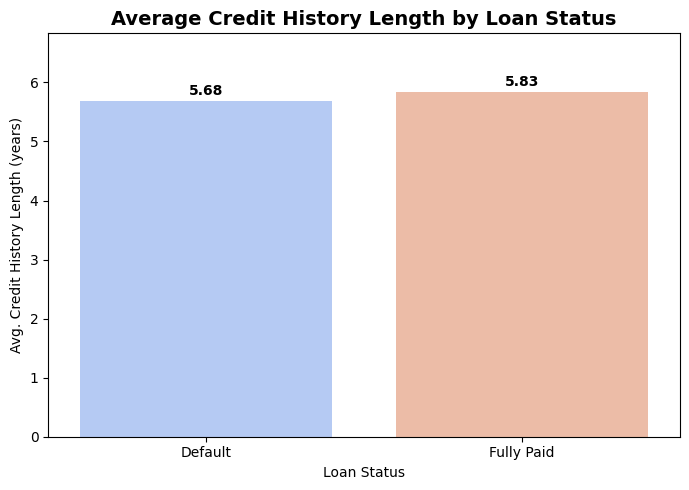

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare readable loan status column if not already done
df['loan_status_label'] = df['loan_status'].map({0: 'Fully Paid', 1: 'Default'})

# Compute average credit history by status
credit_hist_avg = df.groupby('loan_status_label')['cb_person_cred_hist_length'].mean().reset_index()
credit_hist_avg.columns = ['Loan Status', 'Average Credit History (years)']

# Plot
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    data=credit_hist_avg,
    x='Loan Status',
    y='Average Credit History (years)',
    hue='Loan Status',
    palette='coolwarm',
    legend=False
)

# Add value labels with clearer spacing
for i, row in credit_hist_avg.iterrows():
    avg = row['Average Credit History (years)']
    ax.text(i, avg + 0.05, f"{avg:.2f}", ha='center', va='bottom', fontweight='bold', fontsize=10)

# Titles and layout
plt.title('Average Credit History Length by Loan Status', fontsize=14, fontweight='bold')
plt.xlabel('Loan Status')
plt.ylabel('Avg. Credit History Length (years)')
plt.ylim(0, credit_hist_avg['Average Credit History (years)'].max() + 1)
plt.tight_layout()
plt.show()


Defaulted loans have a shorter average credit history (5.68 years)

Fully paid loans have slightly longer credit history (5.93 years)
✅ Suggests: longer credit history slightly reduces risk, though the difference isn’t huge.

In [88]:
df.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)

loan_status                   1.000000
loan_percent_income           0.377525
loan_int_rate                 0.338064
loan_amnt                     0.109998
cb_person_cred_hist_length   -0.015524
person_age                   -0.020762
person_emp_length            -0.085441
person_income                -0.201085
Name: loan_status, dtype: float64

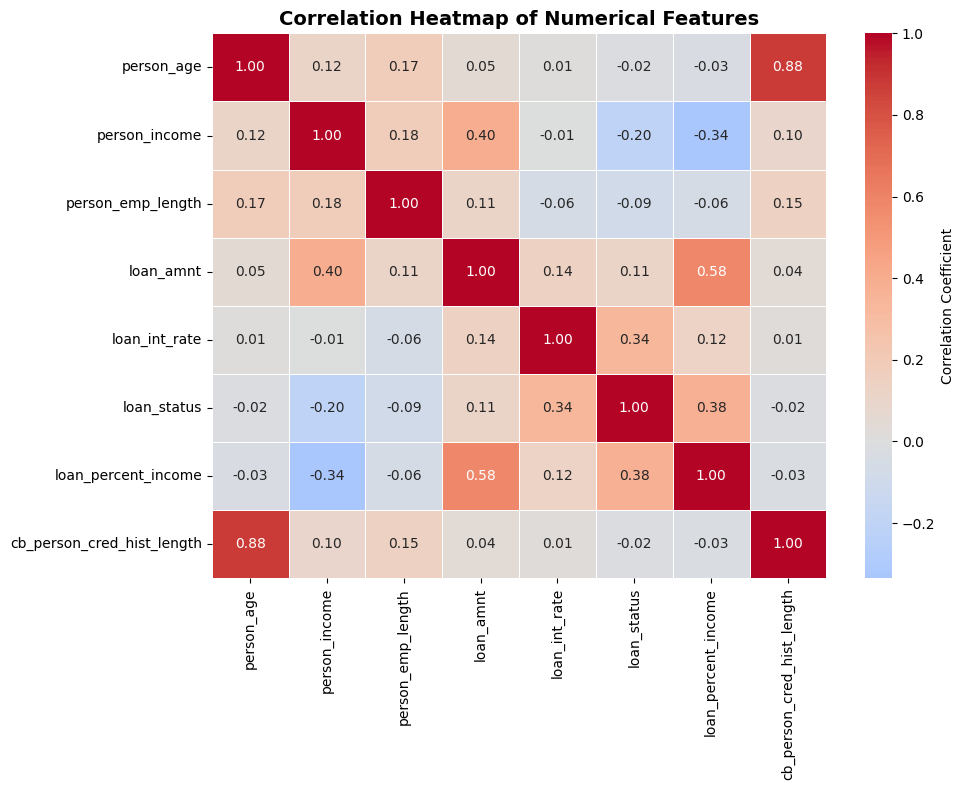

In [89]:
# 1. Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# 2. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

# 4. Title and layout
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

DATA PREPROCESSING

In [113]:
df_model=mldf.copy()

In [114]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df_model, columns=[
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
], drop_first=True)  # drop_first=True avoids multicollinearity


In [115]:
class_counts = df['loan_status'].value_counts()

# Display the raw counts
print("Class Distribution:\n", class_counts)

Class Distribution:
 loan_status
0    24799
1     6782
Name: count, dtype: int64


In [116]:
y = df_encoded['loan_status']  
X = df_encoded.drop(columns=['loan_status'])

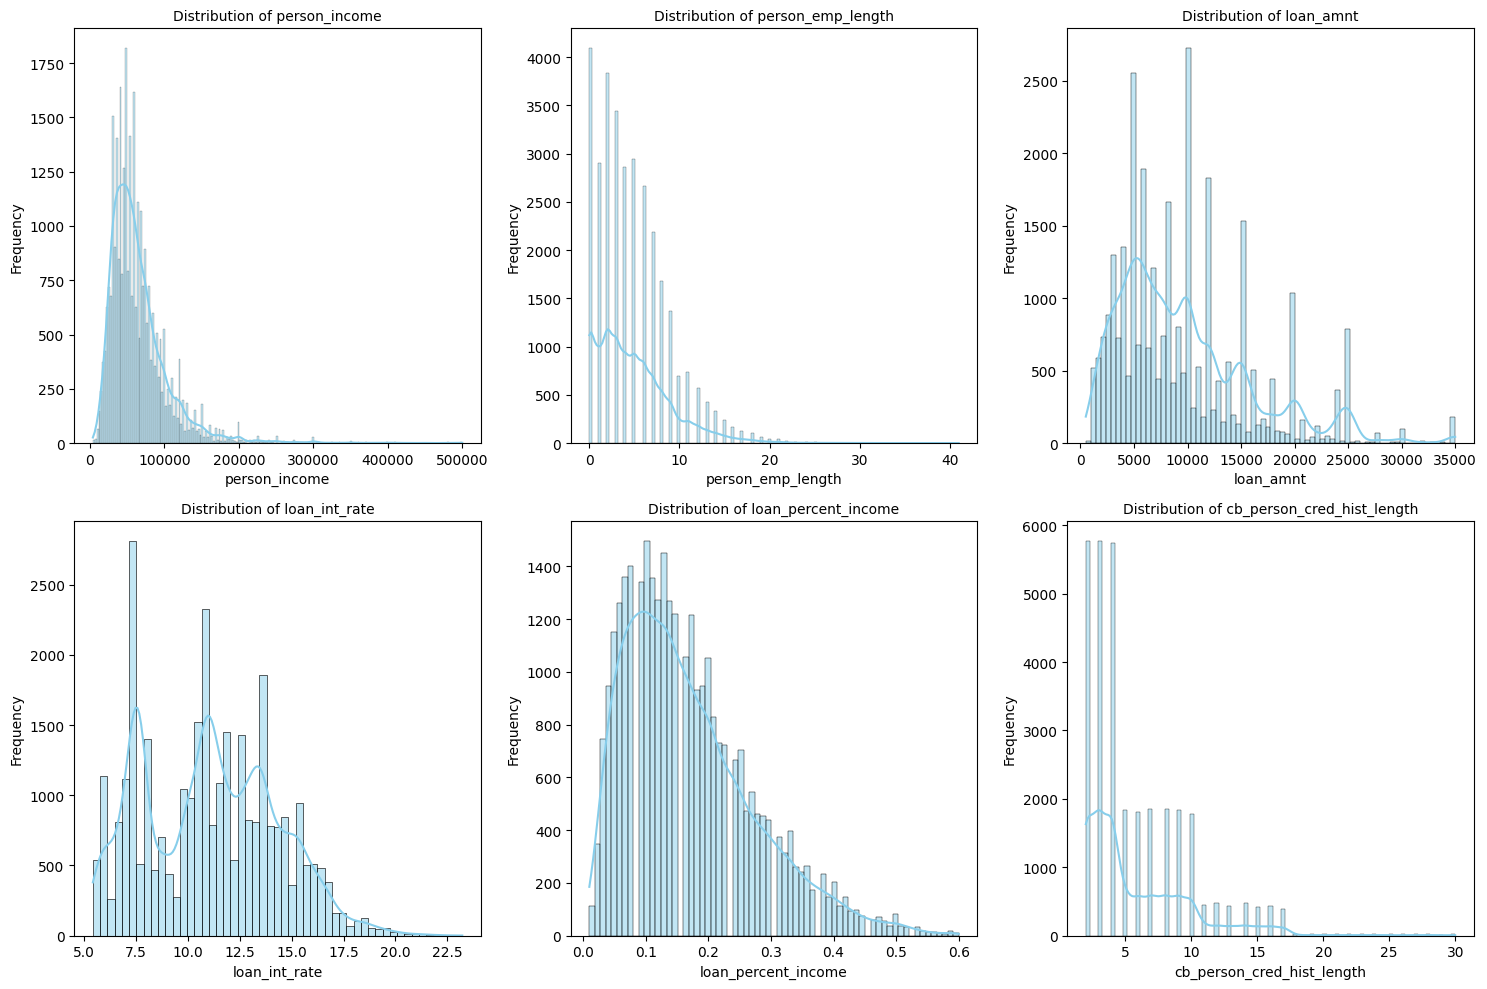

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
num_cols = ['person_income', 'person_emp_length', 'loan_amnt',
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [118]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Copy original dataset to avoid mutation
X_scaled = X.copy()

# Define column groups
robust_cols = [
    'person_income',
    'person_emp_length',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

standard_cols = [
    'loan_amnt',
    'loan_int_rate'
]

# Initialize scalers
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

# Apply RobustScaler
X_scaled[robust_cols] = robust_scaler.fit_transform(X_scaled[robust_cols])

# Apply StandardScaler
X_scaled[standard_cols] = standard_scaler.fit_transform(X_scaled[standard_cols])


In [119]:
X_scaled.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1          21      -1.145679                0.2  -1.367506       0.031044   
2          25      -1.145679               -0.6  -0.655443       0.571210   
3          23       0.234568                0.0   4.012530       1.308083   
4          24      -0.039506                0.8   4.012530       1.008338   
5          21      -1.138272               -0.4  -1.130152      -1.217893   

   loan_percent_income  cb_person_cred_hist_length  \
1            -0.357143                        -0.4   
2             3.000000                        -0.2   
3             2.714286                        -0.4   
4             2.857143                         0.0   
5             0.714286                        -0.4   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
1                        False                       True   
2                        False                      False   
3                        False                      False   
4                        False                      False   
5                        False                       True   

   person_home_ownership_RENT  ...  loan_intent_MEDICAL  loan_intent_PERSONAL  \
1                       False  ...                False                 False   
2                       False  ...                 True                 False   
3                        True  ...                 True                 False   
4                        True  ...                 True                 False   
5                       False  ...                False                 False   

   loan_intent_VENTURE  loan_grade_B  loan_grade_C  loan_grade_D  \
1                False          True         False         False   
2                False         False          True         False   
3                False         False          True         False   
4                False         False          True         False   
5                 True         False         False         False   

   loan_grade_E  loan_grade_F  loan_grade_G  cb_person_default_on_file_Y  
1         False         False         False                        False  
2         False         False         False                        False  
3         False         False         False                        False  
4         False         False         False                         True  
5         False         False         False                        False  

[5 rows x 22 columns]

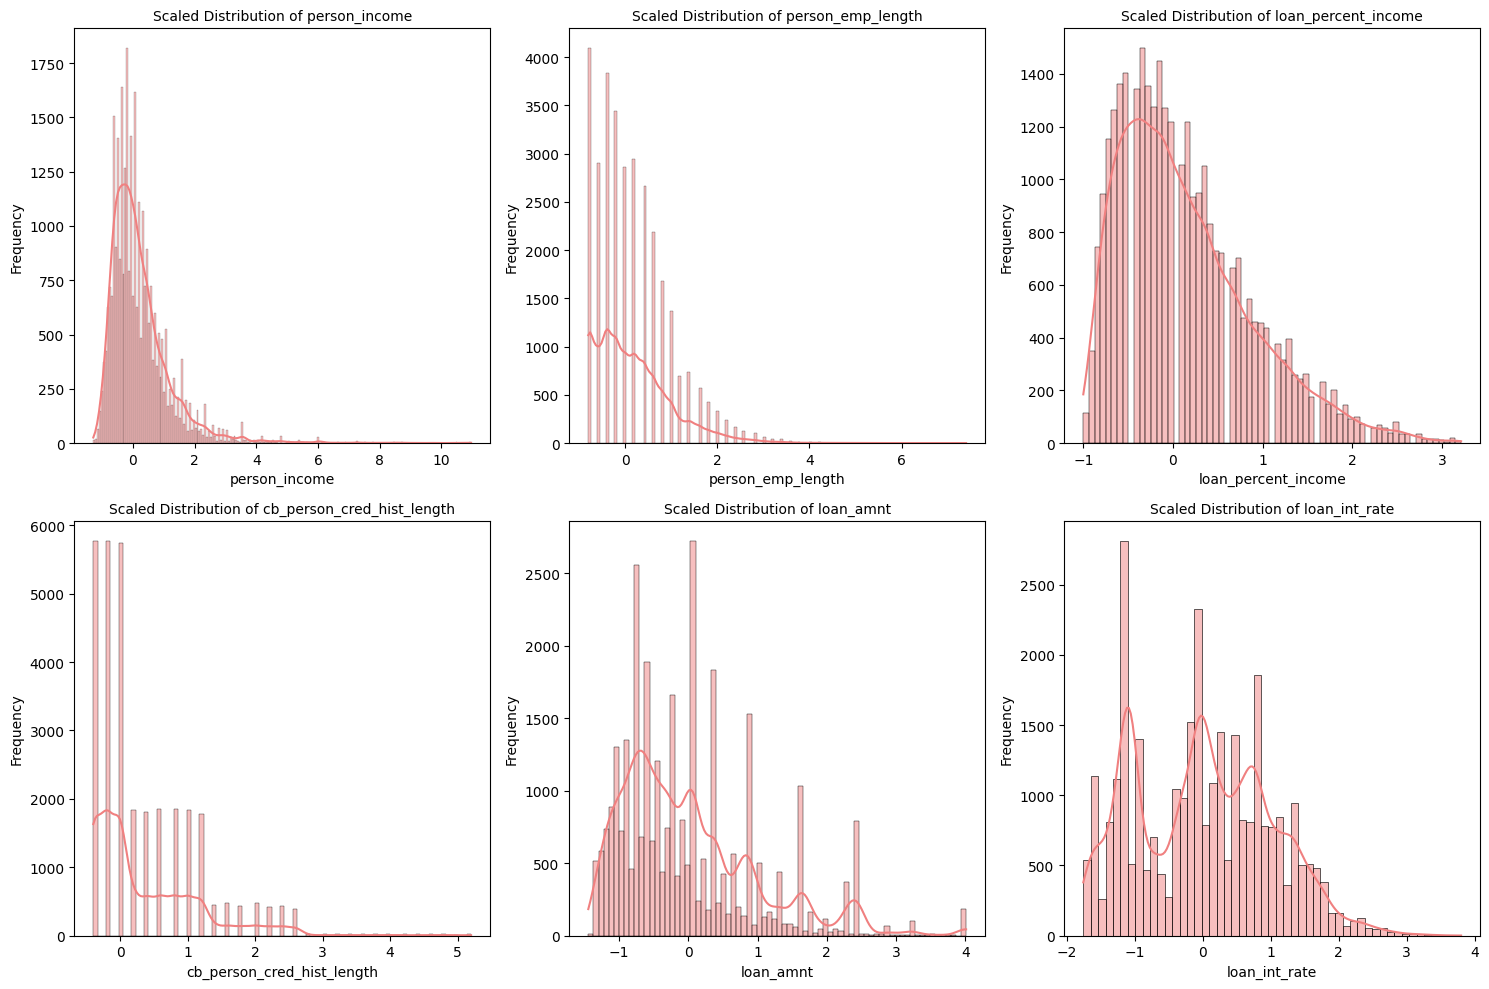

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all scaled numeric columns
scaled_columns = ['person_income', 'person_emp_length', 'loan_percent_income',
                  'cb_person_cred_hist_length', 'loan_amnt', 'loan_int_rate']

# Plot scaled distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(scaled_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_scaled[col], kde=True, color='lightcoral')
    plt.title(f'Scaled Distribution of {col}', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [128]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Initialize SMOTE
smote = SMOTE(random_state=42)

# 2. Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 3. Check the new class distribution
print("Class distribution after SMOTE:\n", Counter(y_resampled))


Class distribution after SMOTE:
 Counter({0: 24799, 1: 24799})


In [129]:
from sklearn.model_selection import train_test_split

# 1. First split into train (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 2. Split train_val into actual train (70%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.125, random_state=42, stratify=y_train_val)

# Check shapes
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (34718, 22)
Validation set: (4960, 22)
Test set: (9920, 22)



📘 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      2480
           1       0.83      0.81      0.82      2480

    accuracy                           0.82      4960
   macro avg       0.82      0.82      0.82      4960
weighted avg       0.82      0.82      0.82      4960

ROC-AUC Score: 0.8887682101977108

🌲 Random Forest Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2480
           1       0.96      0.90      0.93      2480

    accuracy                           0.93      4960
   macro avg       0.93      0.93      0.93      4960
weighted avg       0.93      0.93      0.93      4960

ROC-AUC Score: 0.984346546566077


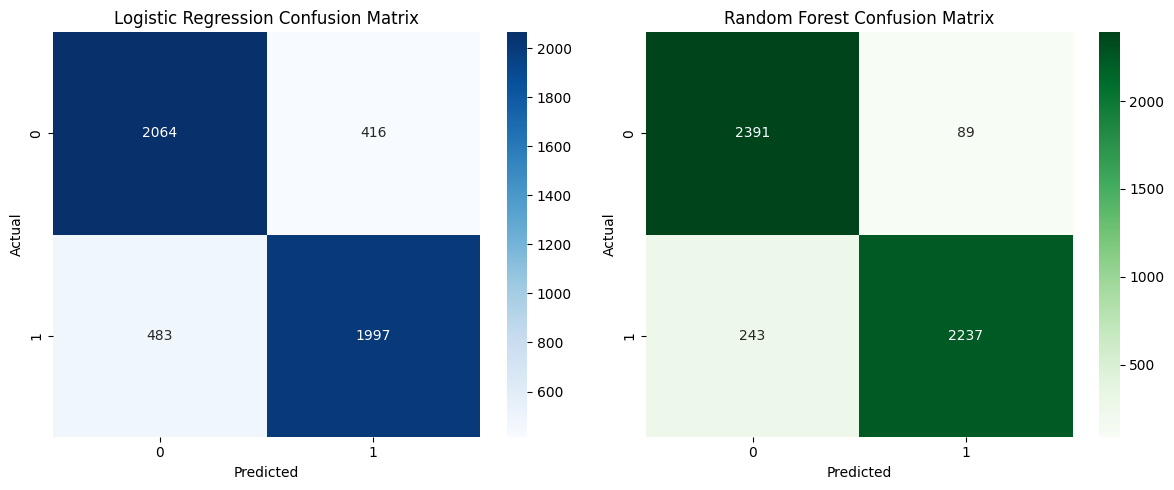

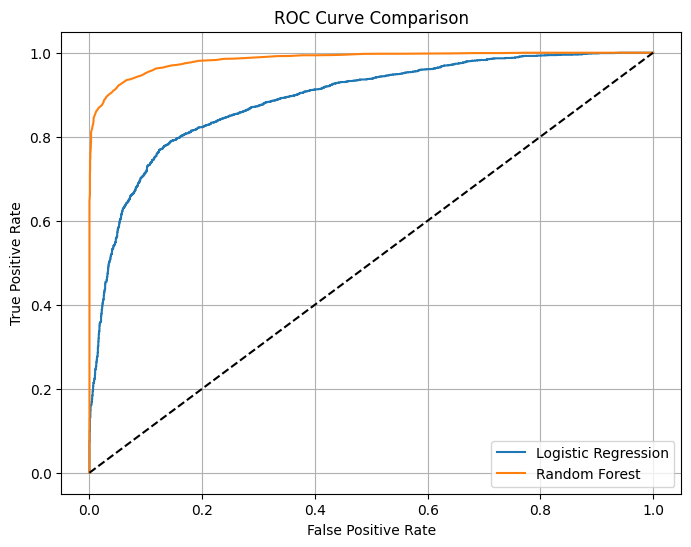

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize models
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 2. Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 3. Predict on validation set
y_pred_logreg = logreg.predict(X_val)
y_pred_rf = rf.predict(X_val)

# 4. Probabilities for ROC AUC
y_prob_logreg = logreg.predict_proba(X_val)[:, 1]
y_prob_rf = rf.predict_proba(X_val)[:, 1]

# 5. Classification Reports
print("\n📘 Logistic Regression Report:\n", classification_report(y_val, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_val, y_prob_logreg))

print("\n🌲 Random Forest Report:\n", classification_report(y_val, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_val, y_prob_rf))

# 6. Confusion Matrices (Optional Visuals)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_val, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# 7. Plot ROC Curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_val, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


HYPERPARAMETRIC TUNING

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Set up GridSearch with validation set scoring
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Run grid search on training data
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_logreg = grid_search.best_estimator_

# Evaluate on validation set
from sklearn.metrics import classification_report, roc_auc_score

y_val_pred = best_logreg.predict(X_val)
y_val_prob = best_logreg.predict_proba(X_val)[:, 1]

print("\n🔍 Tuned Logistic Regression Report:\n", classification_report(y_val, y_val_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_prob))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

🔍 Tuned Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      2480
           1       0.83      0.81      0.82      2480

    accuracy                           0.82      4960
   macro avg       0.82      0.82      0.82      4960
weighted avg       0.82      0.82      0.82      4960

ROC-AUC Score: 0.8887087018730488


FEATURE ENGINEERING

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# ✅ 1. Add polynomial features manually to train/val/test sets

# Start by copying the original scaled features
X_train_poly = X_train.copy()
X_val_poly = X_val.copy()
X_test_poly = X_test.copy()

# Add interactions and squared terms (same transformation across all sets)
X_train_poly['income_loan'] = X_train['person_income'] * X_train['loan_amnt']
X_val_poly['income_loan'] = X_val['person_income'] * X_val['loan_amnt']
X_test_poly['income_loan'] = X_test['person_income'] * X_test['loan_amnt']

X_train_poly['loan_interest'] = X_train['loan_amnt'] * X_train['loan_int_rate']
X_val_poly['loan_interest'] = X_val['loan_amnt'] * X_val['loan_int_rate']
X_test_poly['loan_interest'] = X_test['loan_amnt'] * X_test['loan_int_rate']

X_train_poly['loan_pct_income_sq'] = X_train['loan_percent_income'] ** 2
X_val_poly['loan_pct_income_sq'] = X_val['loan_percent_income'] ** 2
X_test_poly['loan_pct_income_sq'] = X_test['loan_percent_income'] ** 2

X_train_poly['emp_credit'] = X_train['person_emp_length'] * X_train['cb_person_cred_hist_length']
X_val_poly['emp_credit'] = X_val['person_emp_length'] * X_val['cb_person_cred_hist_length']
X_test_poly['emp_credit'] = X_test['person_emp_length'] * X_test['cb_person_cred_hist_length']

X_train_poly['loan_amnt_sq'] = X_train['loan_amnt'] ** 2
X_val_poly['loan_amnt_sq'] = X_val['loan_amnt'] ** 2
X_test_poly['loan_amnt_sq'] = X_test['loan_amnt'] ** 2

X_train_poly['loan_int_rate_sq'] = X_train['loan_int_rate'] ** 2
X_val_poly['loan_int_rate_sq'] = X_val['loan_int_rate'] ** 2
X_test_poly['loan_int_rate_sq'] = X_test['loan_int_rate'] ** 2

X_train_poly['loan_pct_income_int'] = X_train['loan_percent_income'] * X_train['loan_int_rate']
X_val_poly['loan_pct_income_int'] = X_val['loan_percent_income'] * X_val['loan_int_rate']
X_test_poly['loan_pct_income_int'] = X_test['loan_percent_income'] * X_test['loan_int_rate']

# ✅ 2. Define ElasticNet model
log_reg_elastic = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    class_weight={0: 1, 1: 2},
    max_iter=1000
)

# ✅ 3. Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# ✅ 4. Grid search with 5-fold cross-validation on TRAIN set
grid_search_elastic = GridSearchCV(
    log_reg_elastic,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# ✅ 5. Train on training data with polynomial features
grid_search_elastic.fit(X_train_poly, y_train)

# ✅ 6. Evaluate on validation set
best_elastic_model = grid_search_elastic.best_estimator_
y_val_pred_elastic = best_elastic_model.predict(X_val_poly)
y_val_proba_elastic = best_elastic_model.predict_proba(X_val_poly)[:, 1]

# ✅ 7. Show evaluation results
print("\n✅ Best Parameters (Elastic Net):", grid_search_elastic.best_params_)
print("\n📊 Tuned Elastic Net Logistic Regression Report:\n", classification_report(y_val, y_val_pred_elastic))
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_proba_elastic))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

✅ Best Parameters (Elastic Net): {'C': 1, 'l1_ratio': 0.7}

📊 Tuned Elastic Net Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.87      0.70      0.78      2480
           1       0.75      0.89      0.82      2480

    accuracy                           0.80      4960
   macro avg       0.81      0.80      0.80      4960
weighted avg       0.81      0.80      0.80      4960

ROC-AUC Score: 0.8965319328824141


c:\Users\poluk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 600x500 with 0 Axes>

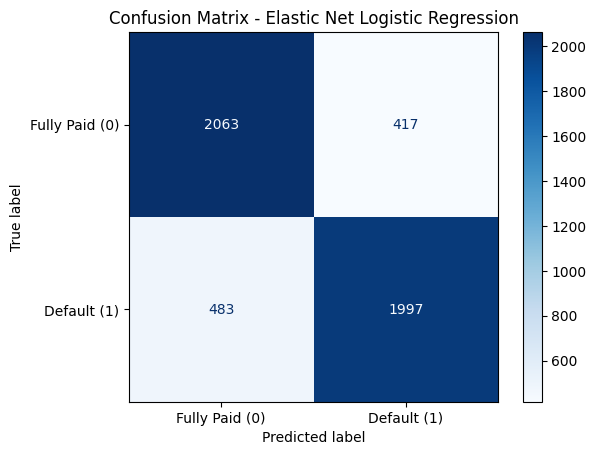

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the predictions (already done earlier)
# y_val_pred = best_elastic_model.predict(X_val_poly)

# Create confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fully Paid (0)', 'Default (1)'])

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Elastic Net Logistic Regression')
plt.grid(False)
plt.show()


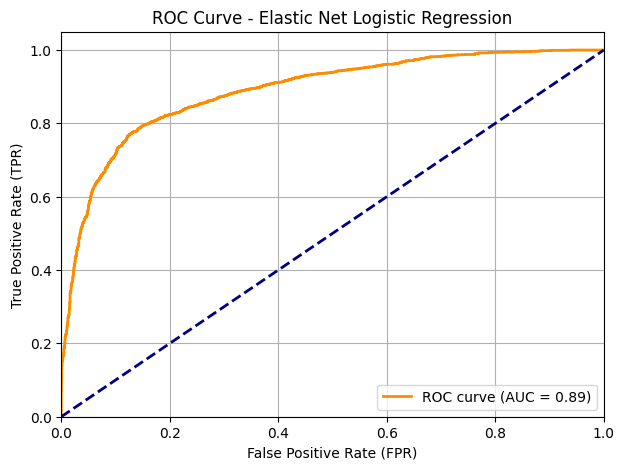

In [135]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities (already done earlier)
# y_val_prob = best_elastic_model.predict_proba(X_val_poly)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Elastic Net Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [136]:
# Predict on test set
y_test_pred_rf = rf.predict(X_test)
y_test_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\n✅ Random Forest Report on Test Set:\n", classification_report(y_test, y_test_pred_rf))
print("ROC-AUC Score (Test Set):", roc_auc_score(y_test, y_test_prob_rf))



✅ Random Forest Report on Test Set:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      4960
           1       0.97      0.91      0.94      4960

    accuracy                           0.94      9920
   macro avg       0.94      0.94      0.94      9920
weighted avg       0.94      0.94      0.94      9920

ROC-AUC Score (Test Set): 0.9842471831100418


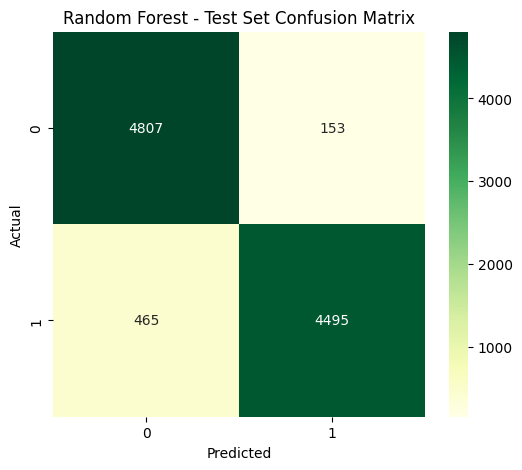

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt='d', cmap='YlGn')
plt.title("Random Forest - Test Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


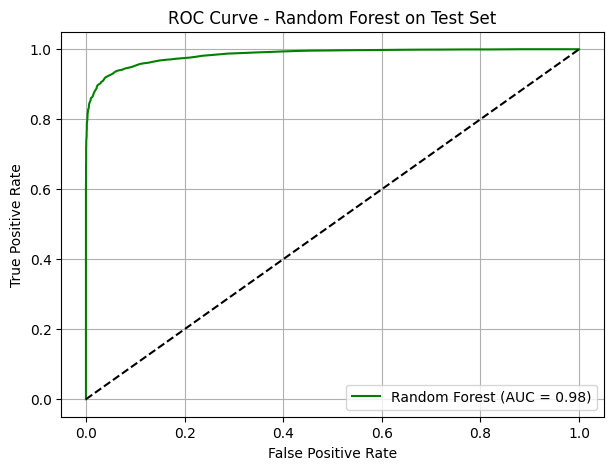

In [138]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest on Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\poluk\AppData\Local\Temp\ipykernel_6940\771087349.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(15), x='Importance', y='Feature', palette='viridis')


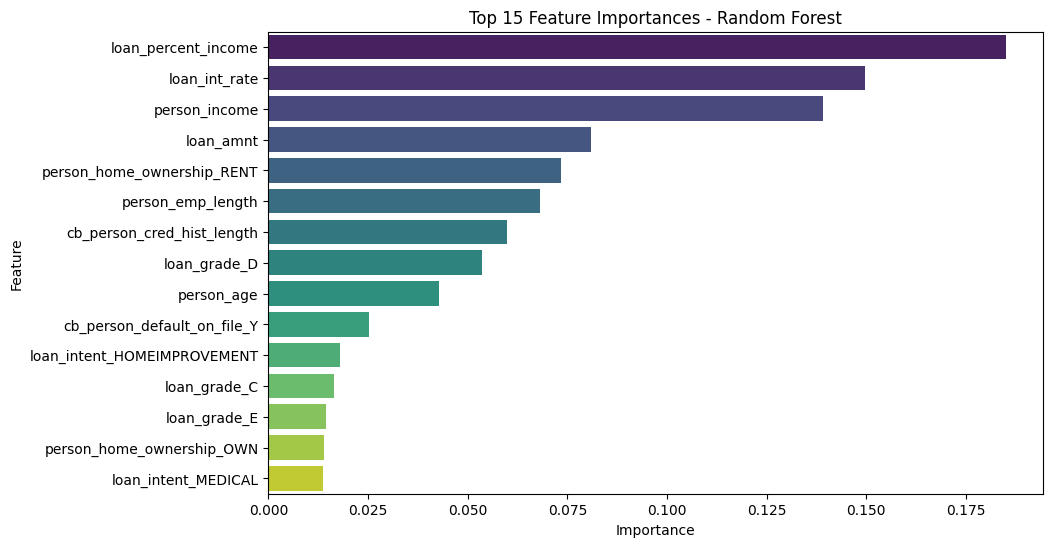

In [139]:
import pandas as pd

importances = rf.feature_importances_
feature_names = X_train.columns  # if using original features
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()
